<a href="https://colab.research.google.com/github/Belal42-O/Time-Series-Forecasting-project/blob/main/time_series_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting**

Source:https://www.kaggle.com/datasets/neuromusic/avocado-prices

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
avo=pd.read_csv("/content/avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
avo.isna().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [ ]:
avo.sort_values(by="Date",inplace=True)

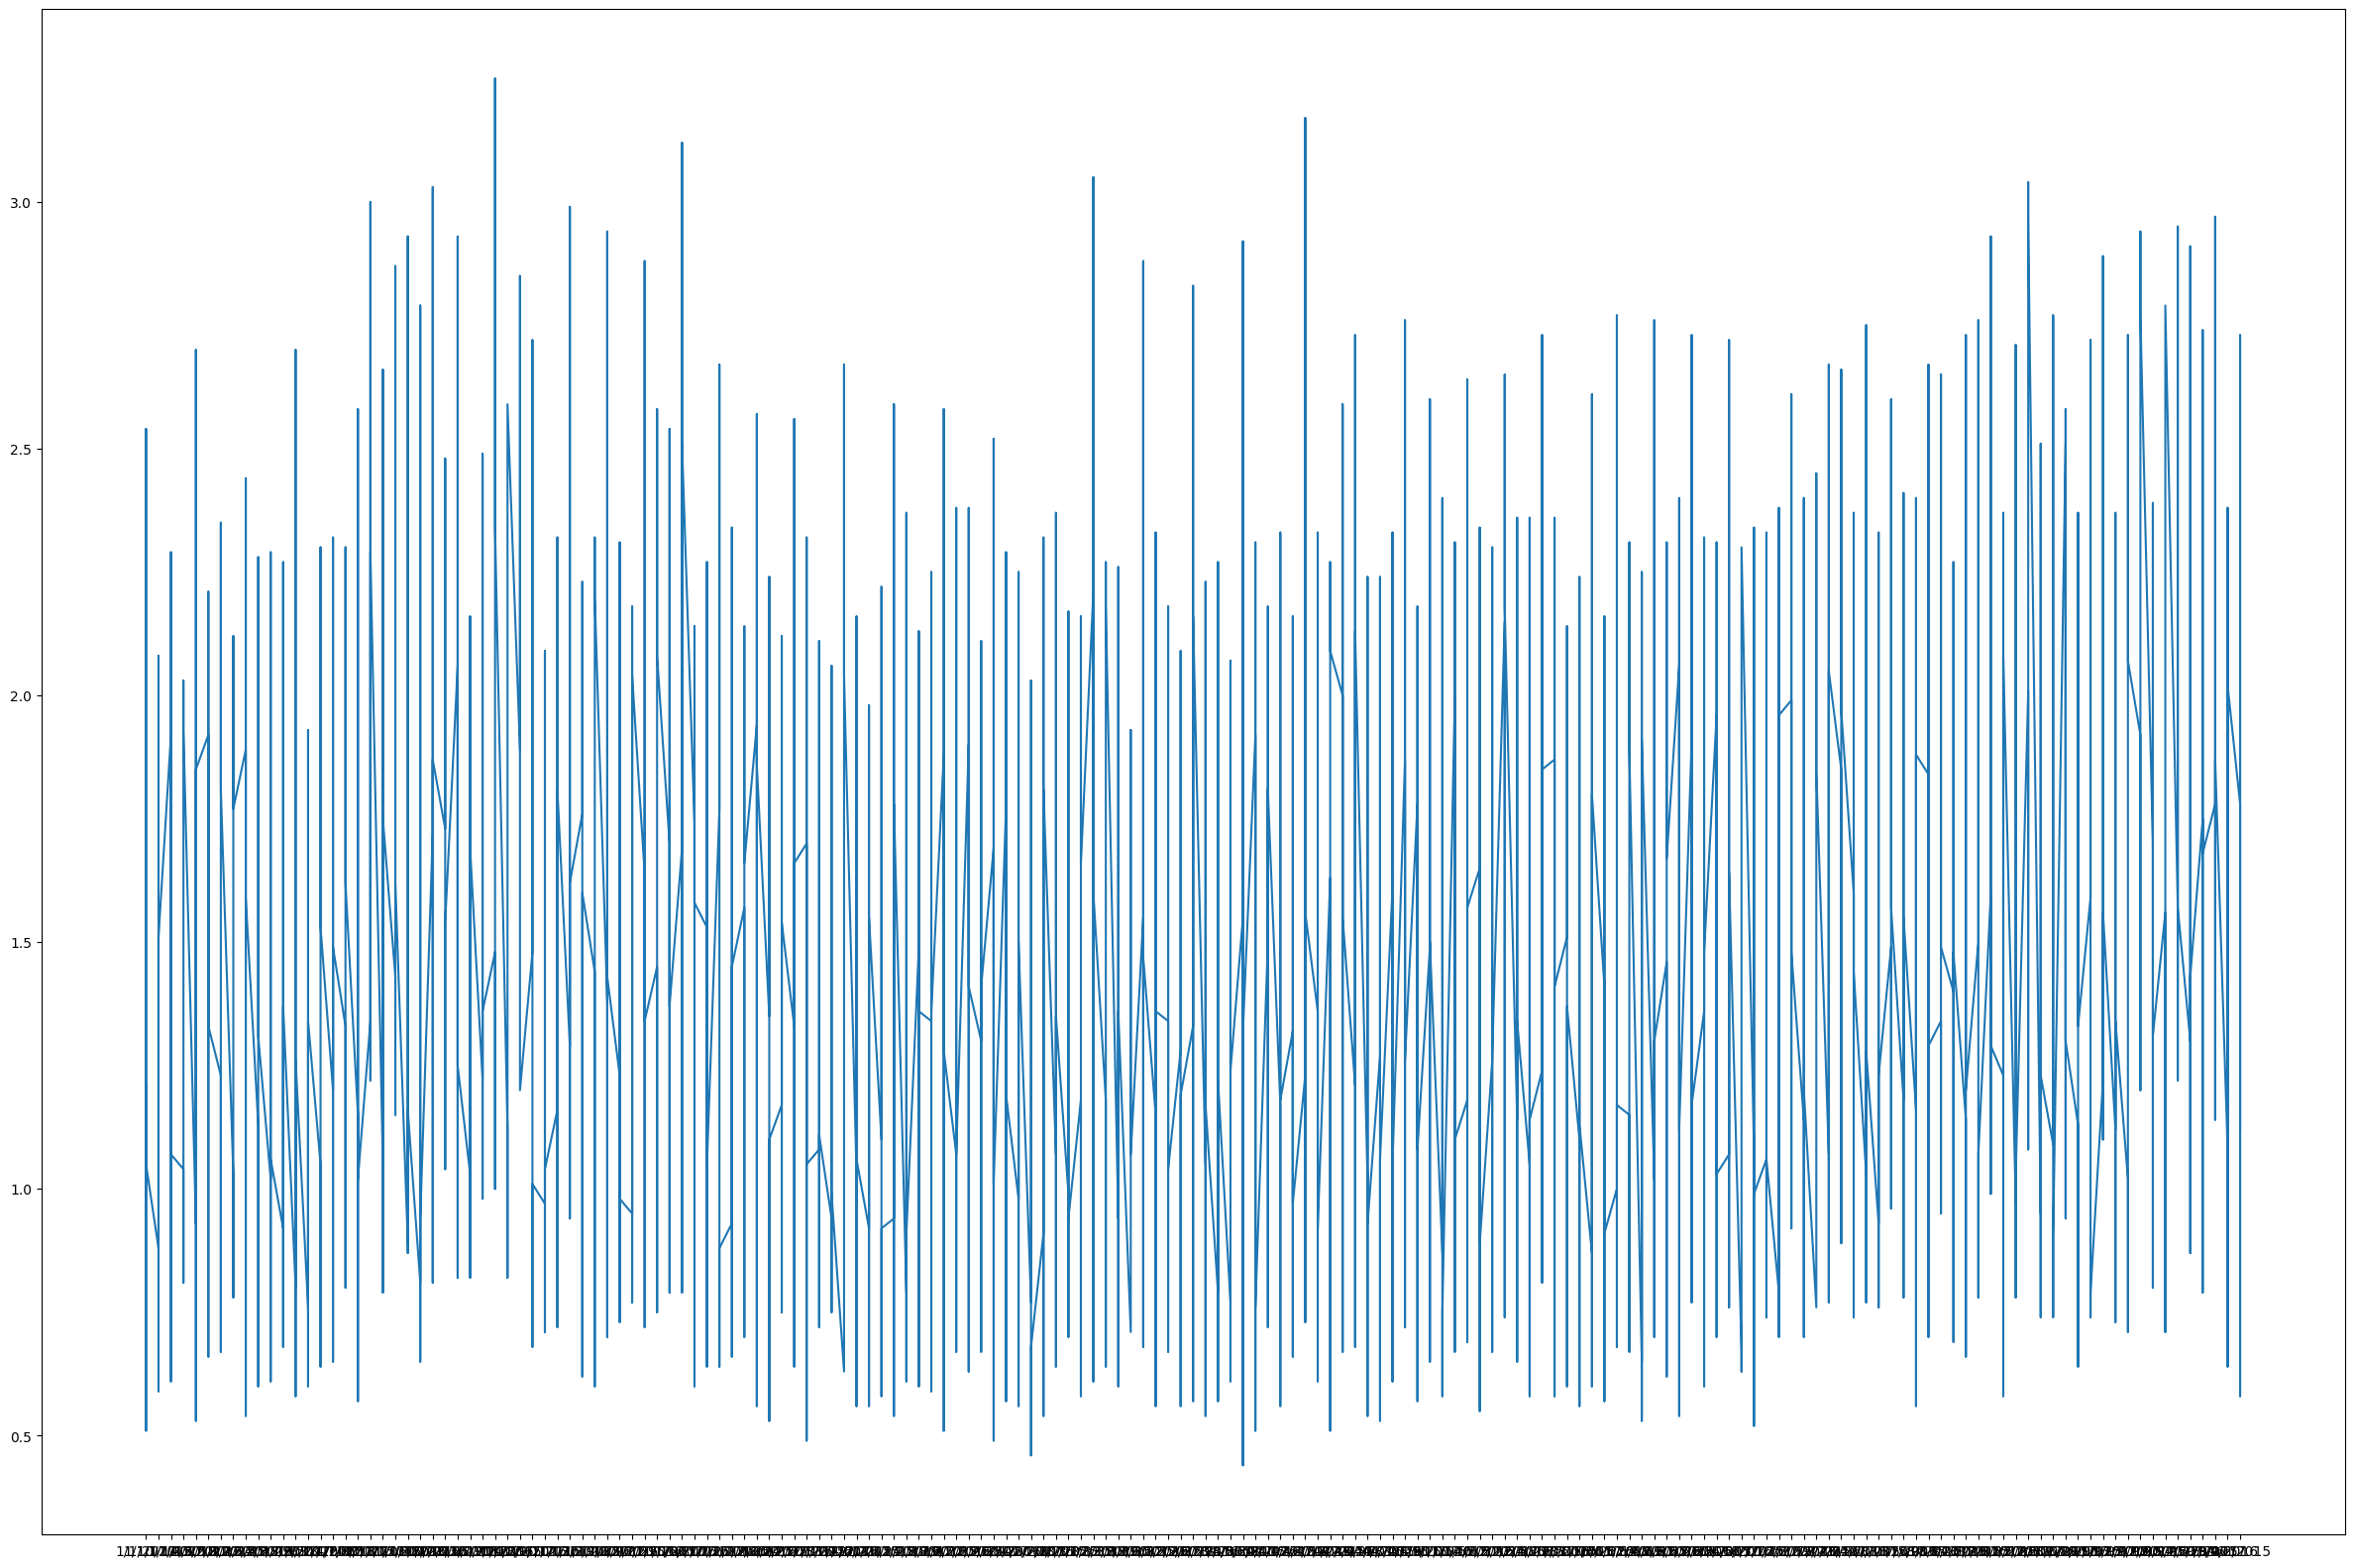

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(avo["Date"],avo["AveragePrice"])


<Axes: xlabel='year', ylabel='count'>

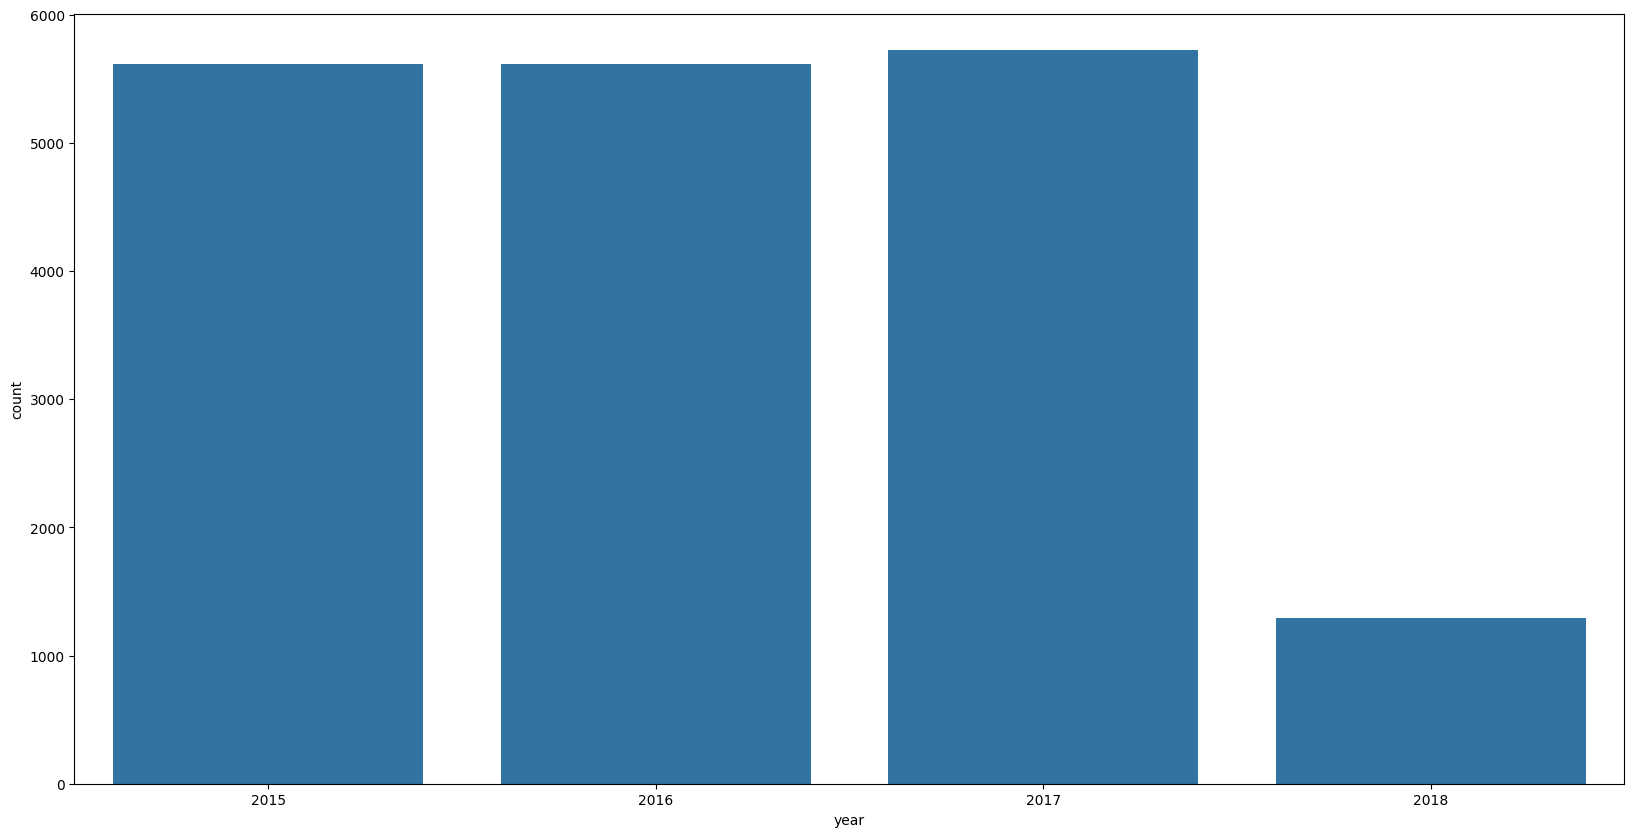

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='year',data=avo)

# preprocessing


In [ ]:
avo_prophet=avo[["Date","AveragePrice"]]
avo_prophet

,Date,AveragePrice
6039,1/1/2017,1.21
5827,1/1/2017,0.92
6516,1/1/2017,1.35
15323,1/1/2017,1.58
15853,1/1/2017,1.24
...,...,...
10130,9/6/2015,1.62
2200,9/6/2015,1.54
10182,9/6/2015,2.07
900,9/6/2015,1.27


In [ ]:
avo_prophet.columns=["ds","y"]
model=Prophet()
model.fit(avo_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5j0yo166/71_3h_tu.json


In [ ]:
future=model.make_future_dataframe(periods=365)
future

In [ ]:
future.tail()
forecast=model.predict(future)
forecast

In [ ]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

In [ ]:
fig_forecast=model.plot(forecast,xlabel="Date",ylabel="AveragePrice")


In [ ]:
fig_model=model.plot_components(forecast)